# Curso: Bioestat√≠stica ‚Äî An√°lise de Covari√¢ncia
## Autores: Sandro da Silva Camargo e Fernando Cardoso

**Problema**: Testar a resposta de √≥rg√£os de animais √† adi√ß√£o de horm√¥nios.
O abate por anestesia e usando a decapita√ß√£o podem provocar respostas diferentes;
Experimento feito em 2 grupos de ratos (mesma idade e sexo): 10 animais mortos por anestesia e 10 decapitados. Os cora√ß√µes foram colocados no soro e a for√ßa de contra√ß√£o medida (Y);

A base de dados est√° dispon√≠vel [aqui](https://github.com/Sandrocamargo/biostatistics/blob/master/datasets/ancova-ratos.txt).

Abra este c√≥digo no seu google colab [clicando aqui](https://colab.research.google.com/github/Sandrocamargo/biostatistics/blob/master/python/bioe_07_Ancova.ipynb).

# Carga de pacotes

In [7]:
!pip install pingouin
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pingouin as pg

# Carga e inspe√ß√£o dos dados

In [8]:
dados = pd.read_csv("https://raw.githubusercontent.com/Sandrocamargo/biostatistics/refs/heads/master/datasets/ancova-ratos.txt", sep=" ", decimal=",")
dados['Trt'] = dados['Trt'].astype('category')
dados.info()
dados.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Trt     20 non-null     category
 1   y       20 non-null     float64 
 2   Peso    20 non-null     float64 
dtypes: category(1), float64(2)
memory usage: 596.0 bytes


Trt    y  Peso
0  Anestesiado  4.5  1.35
1  Anestesiado  4.6  1.30
2  Anestesiado  5.0  1.48
3  Anestesiado  4.8  1.50
4  Anestesiado  4.0  1.20

# An√°lise explorat√≥ria

Correla√ß√£o entre y e Peso: 0.8923


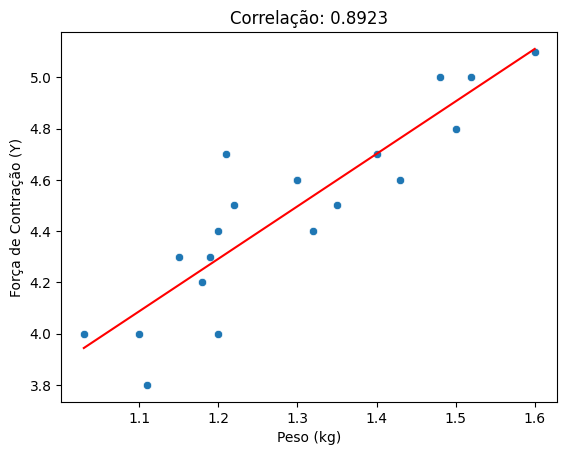

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     70.30
Date:                Tue, 21 Oct 2025   Prob (F-statistic):           1.25e-07
Time:                        23:49:42   Log-Likelihood:                 8.4094
No. Observations:                  20   AIC:                            -12.82
Df Residuals:                      18   BIC:                            -10.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8359      0.317      5.792      0.0

In [17]:
# Correla√ß√£o entre y e Peso
corr = dados['y'].corr(dados['Peso'])
print(f"Correla√ß√£o entre y e Peso: {corr:.4f}")

modelo = smf.ols("y ~ Peso", data=dados).fit()
sns.scatterplot(x='Peso', y='y', data=dados)
plt.title(f"Correla√ß√£o: {corr:.4f}")
sns.lineplot(x=dados['Peso'], y=modelo.fittedvalues, color='red')
plt.xlabel("Peso (kg)")
plt.ylabel("For√ßa de Contra√ß√£o (Y)")
plt.show()

print(modelo.summary())

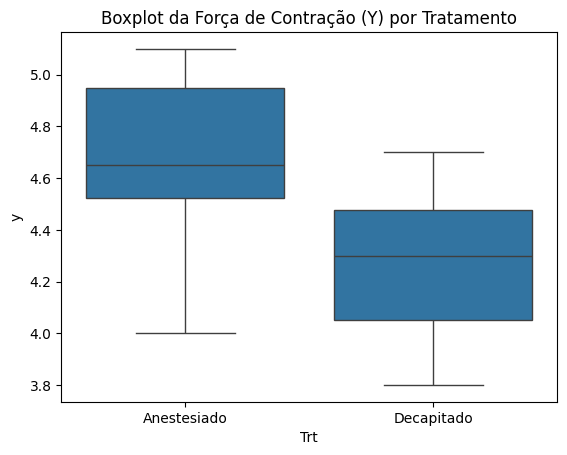

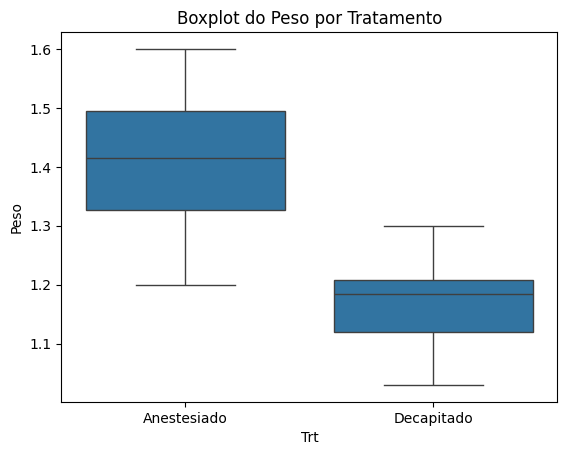


Resumo de Y por grupo:
             count  mean       std  min    25%   50%    75%  max
Trt                                                             
Anestesiado   10.0  4.67  0.330151  4.0  4.525  4.65  4.950  5.1
Decapitado    10.0  4.28  0.285968  3.8  4.050  4.30  4.475  4.7

Resumo de Peso por grupo:
             count   mean       std   min     25%    50%     75%  max
Trt                                                                  
Anestesiado   10.0  1.410  0.120000  1.20  1.3275  1.415  1.4950  1.6
Decapitado    10.0  1.169  0.075196  1.03  1.1200  1.185  1.2075  1.3


In [19]:
# Boxplots
sns.boxplot(x='Trt', y='y', data=dados)
plt.title("Boxplot da For√ßa de Contra√ß√£o (Y) por Tratamento")
plt.show()

sns.boxplot(x='Trt', y='Peso', data=dados)
plt.title("Boxplot do Peso por Tratamento")
plt.show()

# Estat√≠sticas descritivas
print("\nResumo de Y por grupo:")
print(dados.groupby('Trt', observed=False)['y'].describe())
print("\nResumo de Peso por grupo:")
print(dados.groupby('Trt', observed=False)['Peso'].describe())

# An√°lise de covari√¢ncia

In [10]:
ancova = pg.ancova(data=dados, dv='y', covar='Peso', between='Trt')
print("\n=== Resultado da ANCOVA ===")
print(ancova)


=== Resultado da ANCOVA ===
     Source        SS  DF          F         p-unc       np2
0       Trt  0.139036   1   6.457620  2.108876e-02  0.275289
1      Peso  1.350980   1  62.747081  4.174704e-07  0.786826
2  Residual  0.366020  17        NaN           NaN       NaN


**Tratamento (Trt)**
* F = 6.46 e p = 0.021 ‚Üí o efeito do tratamento √© estatisticamente significativo (p < 0.05).
* Isso significa que, mesmo ap√≥s controlar o efeito do peso, ainda h√° diferen√ßa significativa entre os grupos de tratamento quanto √† vari√°vel dependente (ex: for√ßa de contra√ß√£o).
* O eta quadrado parcial (Œ∑¬≤p = 0.275) indica um efeito de tamanho moderado: aproximadamente 27,5% da varia√ß√£o ajustada pode ser atribu√≠da ao tratamento.

**Covari√°vel (Peso)**
* F = 62.75 e p < 0.000001 ‚Üí o peso tem forte efeito sobre a vari√°vel dependente.
* O eta quadrado parcial (Œ∑¬≤p = 0.787) indica um efeito muito grande: cerca de 78,7% da varia√ß√£o ajustada est√° associada √† covari√°vel.

**Res√≠duos**
* Representam a varia√ß√£o n√£o explicada pelo modelo.
* Essa soma de quadrados (SS = 0.366) √© relativamente pequena, o que refor√ßa que o modelo explica bem os dados.

**üìà Conclus√£o geral**
* O peso tem forte influ√™ncia sobre a vari√°vel resposta.
* Mesmo controlando o peso, o tratamento ainda exerce um efeito significativo.
* O modelo como um todo explica grande parte da variabilidade dos dados.

# Ajuste de m√©dias

In [20]:
# Calcula m√©dias ajustadas via modelo linear
modelo_ancova = smf.ols('y ~ Peso + Trt', data=dados).fit()
print("\n=== Modelo ANCOVA ===")
print(modelo_ancova.summary())

# M√©dias ajustadas por tratamento
em_means = dados.copy()
em_means['ajustado'] = modelo_ancova.fittedvalues
print("\nM√©dias ajustadas por tratamento:")
print(em_means.groupby('Trt', observed=False)['ajustado'].mean())


=== Modelo ANCOVA ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     49.03
Date:                Tue, 21 Oct 2025   Prob (F-statistic):           8.72e-08
Time:                        23:54:12   Log-Likelihood:                 11.629
No. Observations:                  20   AIC:                            -17.26
Df Residuals:                      17   BIC:                            -14.27
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept      

**Qual o objetivo da an√°lise?**
* A ANCOVA busca verificar se h√° diferen√ßa entre os grupos de tratamento na vari√°vel y, controlando o efeito do peso.
* Em outras palavras: queremos saber se o tratamento afeta y independentemente do peso dos animais.

**üìä 2. Qualidade geral do modelo**
* R¬≤ = 0.852 ‚Üí o modelo explica 85,2% da varia√ß√£o total em y, o que √© excelente.
* R¬≤ ajustado = 0.835 ‚Üí mesmo considerando o n√∫mero de preditores, o modelo mant√©m boa capacidade explicativa.
* F(2,17) = 49.03, p = 8.72√ó10‚Åª‚Å∏ ‚Üí o modelo global √© altamente significativo, ou seja, peso e tratamento, em conjunto, explicam de forma robusta a varia√ß√£o em y.

**‚öôÔ∏è 3. Interpreta√ß√£o dos coeficientes**
|Termo	|Coef.	|Interpreta√ß√£o|
|:--|:--|:--|
|Intercepto |= 0.8124	|Valor esperado de y para o grupo Anestesiado, quando Peso = 0 (interpreta√ß√£o matem√°tica, n√£o biol√≥gica).	|
|Trt[T.Decapitado] = 0.2693, |p = 0.021	|O grupo Decapitado apresenta, em m√©dia, +0.27 unidades maiores de y do que o grupo Anestesiado, ajustando o efeito do peso. Como p < 0.05, essa diferen√ßa √© estatisticamente significativa.	|
|Peso = 2.7359, |p < 0.001	|A cada aumento de 1 unidade de peso, h√° um acr√©scimo m√©dio de 2.74 unidades em y, mantendo o tratamento constante. O efeito do peso √© forte e altamente significativo.	|

**‚öñÔ∏è 4. M√©dias ajustadas (ANCOVA)**
* As m√©dias ajustadas representam os valores de y esperados para cada grupo de tratamento, corrigidos pelo efeito do peso.

|Tratamento	|M√©dia ajustada de y|
|:--|:--|
|Anestesiado	|4.67|
|Decapitado	|4.28|

* ‚û°Ô∏è Embora o coeficiente positivo de ‚ÄúDecapitado‚Äù sugira maior valor inicial, ap√≥s o ajuste pela covari√°vel (peso), o grupo Anestesiado apresenta m√©dia ligeiramente maior (4.67 vs 4.28).

* Isso indica que parte da diferen√ßa bruta entre grupos era explicada pelo peso  e, ap√≥s o controle, a diferen√ßa se reduz.

**üìà 5. Pressupostos**
* Durbin-Watson = 2.19 ‚Üí aus√™ncia de autocorrela√ß√£o dos res√≠duos (bom sinal).
* Teste de normalidade (Omnibus, JB): p > 0.05 ‚Üí res√≠duos aproximadamente normais.
* Cond. No. = 31.5 ‚Üí sem problemas s√©rios de multicolinearidade.

**üß© Conclus√£o**
* O peso exerce forte influ√™ncia sobre y.
* O tratamento ainda tem efeito significativo mesmo ap√≥s controlar o peso (p = 0.021).
* O modelo ajustado explica muito bem os dados.
* As m√©dias ajustadas indicam pequenas diferen√ßas entre os grupos, o que refor√ßa a utilidade da ANCOVA: separar o efeito do tratamento do efeito da covari√°vel.

# Teste de pressupostos


Shapiro-Wilk para res√≠duos:
ShapiroResult(statistic=np.float64(0.96599191200068), pvalue=np.float64(0.6690113873053192))


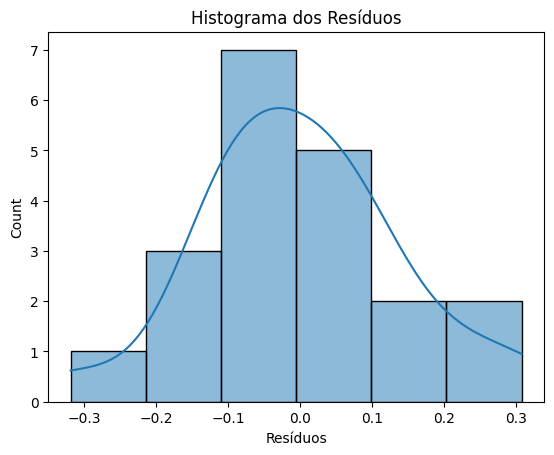


Bartlett test:
BartlettResult(statistic=np.float64(0.1753929866154209), pvalue=np.float64(0.6753627004737937))

Levene test:
LeveneResult(statistic=np.float64(0.13149350649350636), pvalue=np.float64(0.7211113933256456))


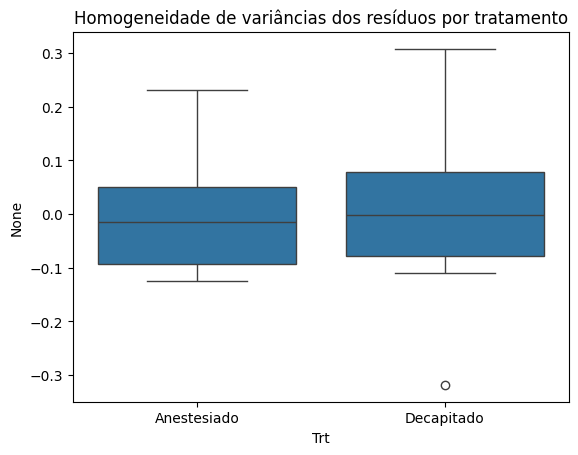

In [12]:
# Normalidade dos res√≠duos
residuos = modelo_ancova.resid
print("\nShapiro-Wilk para res√≠duos:")
print(stats.shapiro(residuos))

sns.histplot(residuos, kde=True)
plt.title("Histograma dos Res√≠duos")
plt.xlabel("Res√≠duos")
plt.show()

# Homogeneidade de vari√¢ncias
print("\nBartlett test:")
print(stats.bartlett(*[dados.loc[dados.Trt == g, 'y'] for g in dados.Trt.unique()]))

print("\nLevene test:")
print(stats.levene(*[dados.loc[dados.Trt == g, 'y'] for g in dados.Trt.unique()]))

sns.boxplot(x='Trt', y=residuos, data=dados)
plt.title("Homogeneidade de vari√¢ncias dos res√≠duos por tratamento")
plt.show()

In [13]:
# ==========================================================
# 6. Intera√ß√£o (homogeneidade dos coeficientes angulares)
# ==========================================================
modelo_interacao = smf.ols('y ~ Trt * Peso', data=dados).fit()
anova_interacao = sm.stats.anova_lm(modelo_interacao, typ=3)
print("\n=== Teste de intera√ß√£o Tratamento*Peso ===")
print(anova_interacao)


=== Teste de intera√ß√£o Tratamento*Peso ===
             sum_sq    df          F    PR(>F)
Intercept  0.069540   1.0   3.139158  0.095474
Trt        0.004301   1.0   0.194137  0.665390
Peso       0.860772   1.0  38.856696  0.000012
Trt:Peso   0.011580   1.0   0.522751  0.480107
Residual   0.354439  16.0        NaN       NaN


**Estrutura geral**

O modelo testou o efeito do Tratamento (Trt), da covari√°vel Peso e da intera√ß√£o entre ambos (Trt:Peso) sobre a vari√°vel dependente y.
O objetivo √© verificar:
* se o tratamento tem efeito sobre y,
* se o peso influencia y,
* e se o efeito do tratamento depende do peso (intera√ß√£o).

**Interpreta√ß√£o dos resultados**
|Fonte|	F	|p (PR(>F))	|Interpreta√ß√£o|
|:--|:--|:--|:--|
|Intercept	|3.14	|0.095	|O intercepto n√£o √© estatisticamente diferente de zero (sem relev√¢ncia pr√°tica isolada).|
|Trt	|0.19	|0.665	|O tratamento n√£o tem efeito significativo sobre y ap√≥s controlar pelo peso.|
|Peso	|38.86	|< 0.001	|O peso tem forte efeito significativo sobre y. √Ä medida que o peso aumenta, y tamb√©m tende a aumentar.|
|Trt:Peso|	0.52	|0.480	|A intera√ß√£o n√£o √© significativa. O efeito do peso sobre y √© semelhante entre os tratamentos.|
|Residual	|‚Äî	|‚Äî	|Variabilidade n√£o explicada pelo modelo.|

**Conclus√£o pr√°tica**
* O peso √© a principal vari√°vel associada a y (efeito forte e significativo).
* O tratamento, por si s√≥, n√£o altera significativamente o valor de y.
* A rela√ß√£o entre peso e y √© paralela entre os grupos (sem intera√ß√£o significativa).
* Portanto, um modelo sem intera√ß√£o (modelo aditivo) √© mais parcimonioso e apropriado.

# Regress√µes separadas por grupo

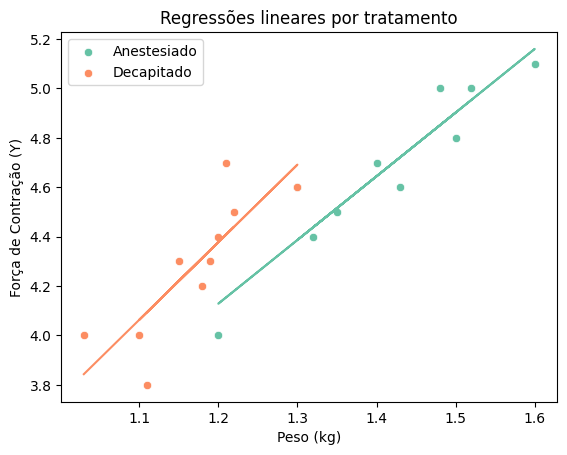

In [14]:
plt.figure()
cores = sns.color_palette("Set2", n_colors=len(dados.Trt.cat.categories))
for i, trt in enumerate(dados.Trt.cat.categories):
    subset = dados[dados.Trt == trt]
    sns.scatterplot(x='Peso', y='y', data=subset, color=cores[i], label=trt)
    modelo = smf.ols('y ~ Peso', data=subset).fit()
    plt.plot(subset['Peso'], modelo.fittedvalues, color=cores[i])
plt.legend()
plt.title("Regress√µes lineares por tratamento")
plt.xlabel("Peso (kg)")
plt.ylabel("For√ßa de Contra√ß√£o (Y)")
plt.show()